##Data Collection and Preparation

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('anemia.csv')
df.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


In [8]:
df.shape

(1421, 6)

In [9]:
df.isnull().sum()

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

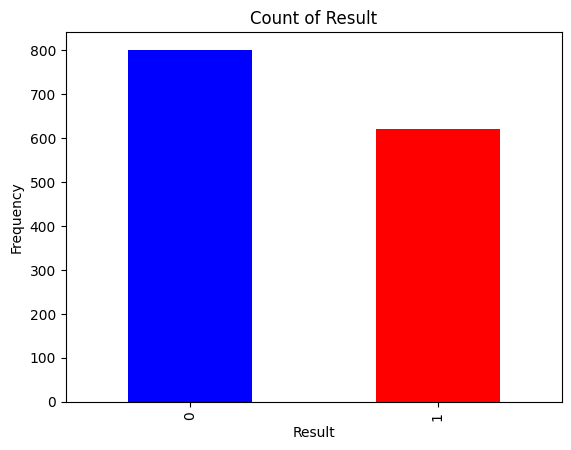

In [10]:
# 0-not anemia 1-anemia
# checking for the count of anemia and not anemia
results = df['Result'].value_counts()
results.plot(kind='bar', color = ["blue", "red"])
plt.xlabel('Result')
plt.ylabel('Frequency')
plt.title('Count of Result')
plt.show()

In [11]:
# we can see that not anemia count is more than anemia count so,
# we can balance it using the undersampling method
from sklearn.utils import resample
majorclass = df[df['Result']==0]
minorclass = df[df['Result']==1]

major_downsample = resample(majorclass, replace=False, n_samples=len(minorclass), random_state=123)
df = pd.concat([major_downsample, minorclass])
print(df['Result'].value_counts())

Result
0    620
1    620
Name: count, dtype: int64


##Exploratory Data Analysis

In [12]:
df.describe()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
count,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000
mean,0.531452,13.194919,22.880323,30.271129,85.417097,0.500000
std,0.499211,1.956083,3.974215,1.404451,9.621420,0.500202
min,0.000000,6.600000,16.000000,27.800000,69.400000,0.000000
25%,0.000000,11.500000,19.400000,29.100000,77.300000,0.000000
50%,1.000000,13.000000,22.750000,30.400000,85.050000,0.500000
75%,1.000000,14.800000,26.100000,31.500000,93.825000,1.000000
max,1.000000,16.900000,30.000000,32.500000,101.600000,1.000000


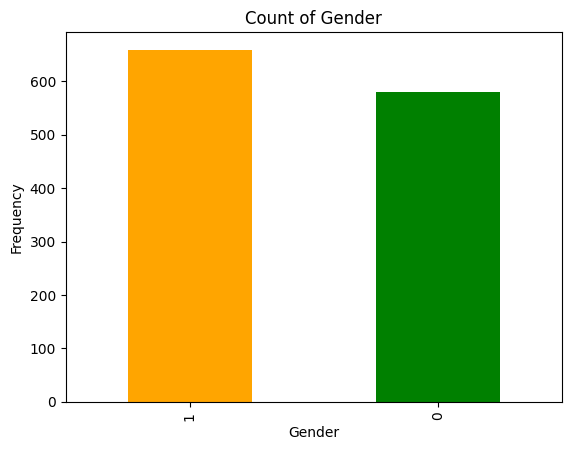

In [13]:
output = df['Gender'].value_counts()
output.plot(kind = 'bar', color=["orange", "green"])
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Count of Gender')
plt.show()

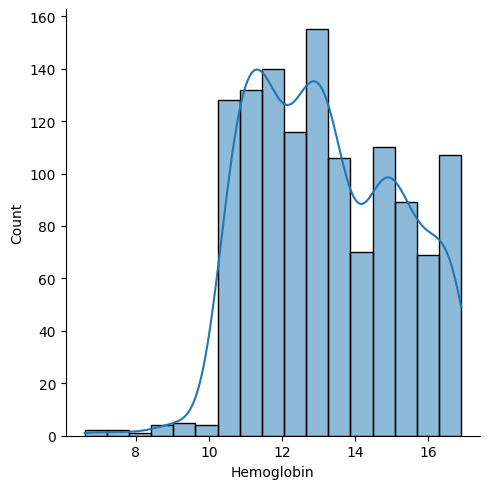

In [14]:
sns.displot(df['Hemoglobin'], kde =True)

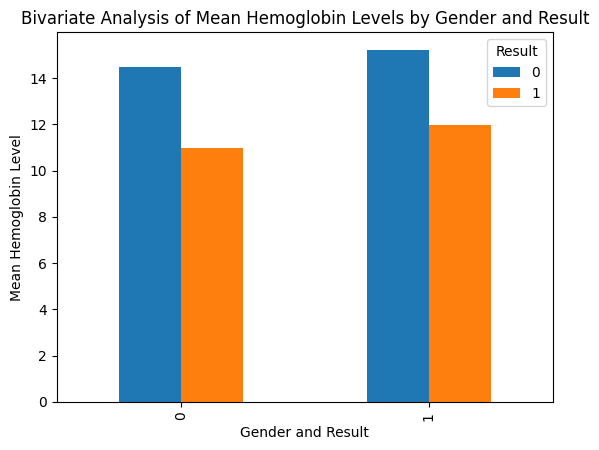

In [15]:
#a bivariate analysis of Histogram of mean Hemoglobin levels by gender and result displays distribution

df_groupby = df.groupby(['Gender', 'Result'])['Hemoglobin'].mean().unstack()
df_groupby.plot(kind='bar')
plt.title('Bivariate Analysis of Mean Hemoglobin Levels by Gender and Result')
plt.xlabel('Gender and Result')
plt.ylabel('Mean Hemoglobin Level')
plt.show()


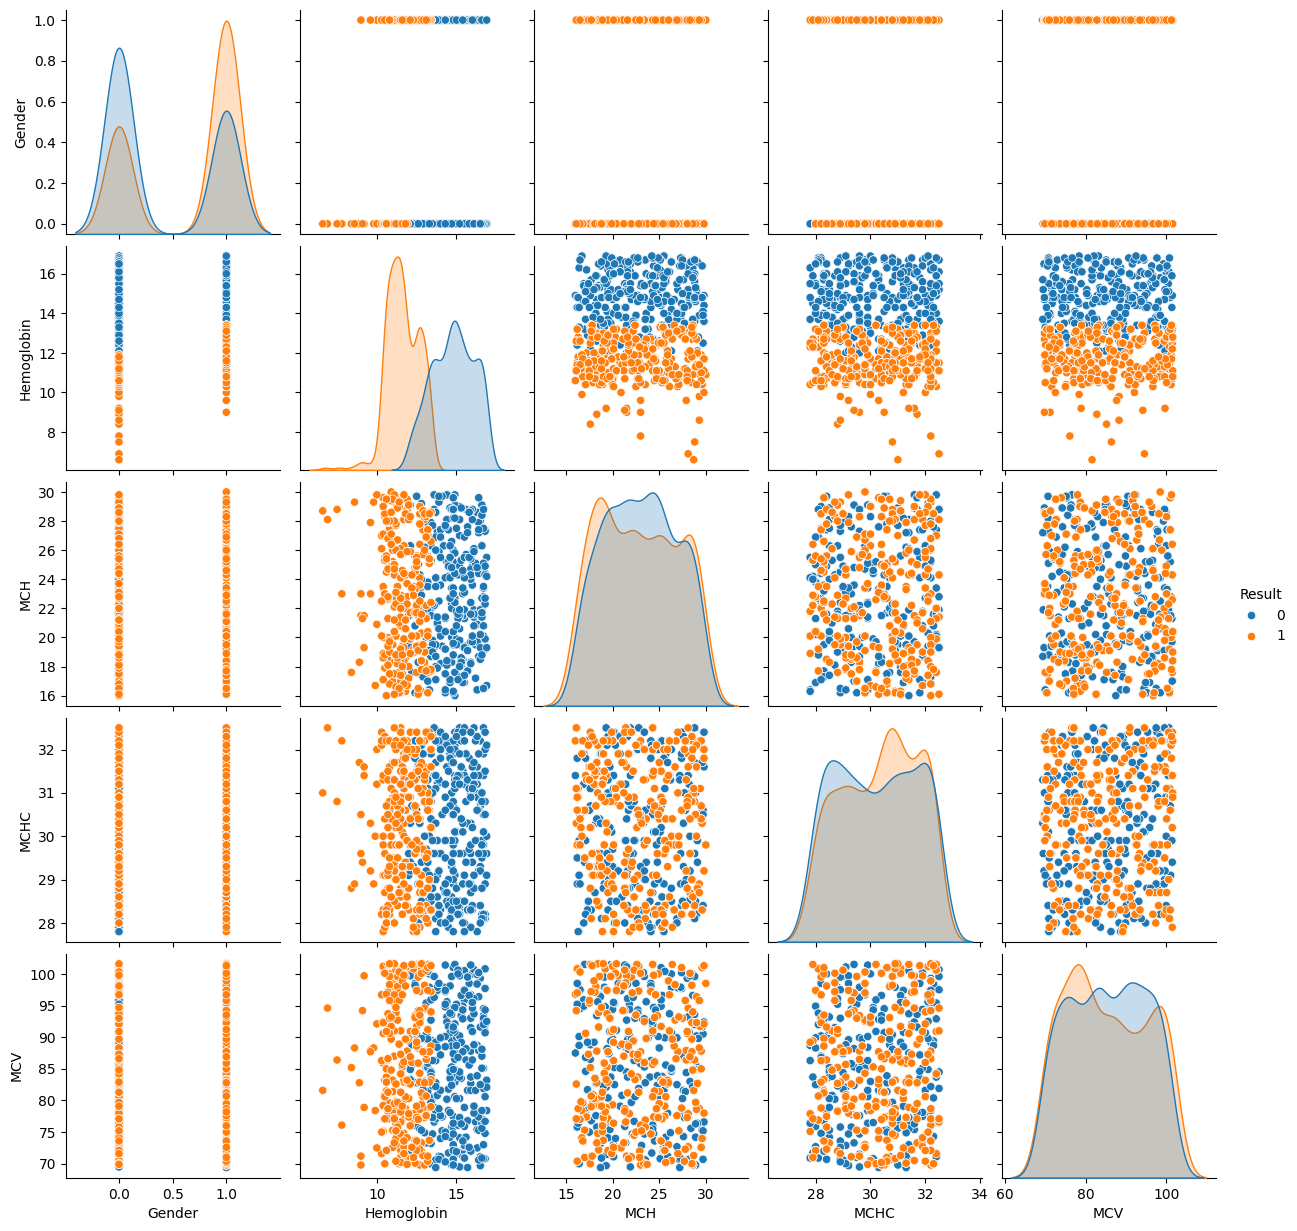

In [16]:
#multivariate analysis is to find the relation between multiple features. Here we have used pairplot from the seaborn package.

sns.pairplot(df, hue='Result')
plt.show()


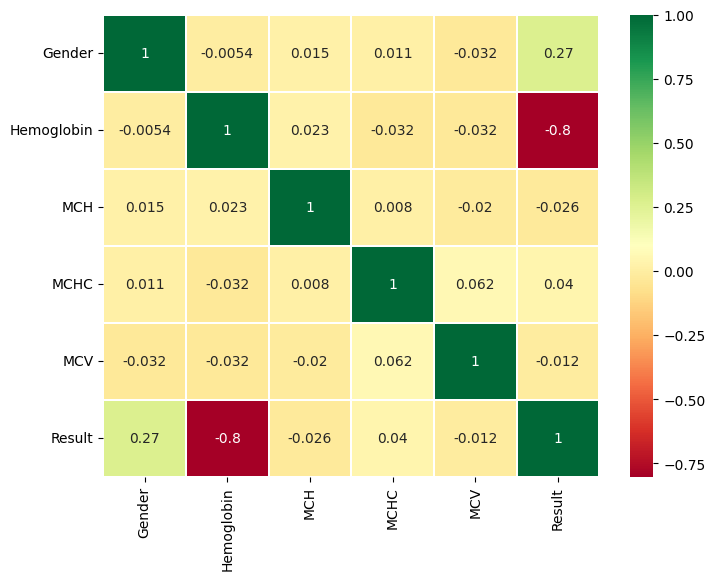

In [17]:
sns.heatmap(df.corr(), annot=True,cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

In [18]:
X = df.drop('Result', axis=1)
X

,Gender,Hemoglobin,MCH,MCHC,MCV
233,1,16.6,29.1,29.9,76.4
1069,0,12.6,16.5,28.9,97.5
395,1,13.9,25.9,31.3,71.2
346,0,13.3,16.4,29.1,70.0
303,0,16.3,28.6,30.9,99.9
...,...,...,...,...,...
1415,1,13.2,20.1,28.8,91.2
1416,0,10.6,25.4,28.2,82.9
1417,1,12.1,28.3,30.4,86.9
1418,1,13.1,17.7,28.1,80.7


In [19]:
Y = df['Result']
Y

233     0
1069    0
395     0
346     0
303     0
       ..
1415    1
1416    1
1417    1
1418    1
1420    1
Name: Result, Length: 1240, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(992, 5)
(248, 5)
(992,)
(248,)


##Model Building

Logistic Regression Model

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, Y_train)
y_pred = logistic_regression.predict(X_test)

acc_lr = accuracy_score(Y_test, y_pred)
print("Accuracy:", acc_lr)

c_lr = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:\n", c_lr)

cr_lr = classification_report(Y_test, y_pred)
print("Classification Report:\n", cr_lr)

Accuracy: 0.9919354838709677
Confusion Matrix:
 [[126   2]
 [  0 120]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       128
           1       0.98      1.00      0.99       120

    accuracy                           0.99       248
   macro avg       0.99      0.99      0.99       248
weighted avg       0.99      0.99      0.99       248



RandomForestClassifier


In [23]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)
y_pred = random_forest.predict(X_test)

acc_rf = accuracy_score(Y_test, y_pred)
print("Accuracy:", acc_rf)

c_rf = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:\n", c_rf)

cr_rf = classification_report(Y_test, y_pred)
print("Classification Report:\n", cr_rf)

Accuracy: 1.0
Confusion Matrix:
 [[128   0]
 [  0 120]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00       120

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248



Decision Tree Model

In [24]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
y_pred = decision_tree.predict(X_test)

acc_dt = accuracy_score(Y_test, y_pred)
print("Accuracy:", acc_dt)

c_dt = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:\n", c_dt)

cr_dt = classification_report(Y_test, y_pred)
print("Classification Report:\n", cr_dt)

Accuracy: 1.0
Confusion Matrix:
 [[128   0]
 [  0 120]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00       120

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248



Guassian Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, Y_train)
y_pred = naive_bayes.predict(X_test)

acc_nb = accuracy_score(Y_test, y_pred)
print("Accuracy:", acc_nb)

c_nb = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:\n", c_nb)

cr_nb = classification_report(Y_test, y_pred)
print("Classification Report:\n", cr_nb)

Accuracy: 0.9717741935483871
Confusion Matrix:
 [[122   6]
 [  1 119]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       128
           1       0.95      0.99      0.97       120

    accuracy                           0.97       248
   macro avg       0.97      0.97      0.97       248
weighted avg       0.97      0.97      0.97       248



Support Vector Machine

In [26]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, Y_train)
y_pred = svm.predict(X_test)

acc_svm = accuracy_score(Y_test, y_pred)
print("Accuracy:", acc_svm)

c_svm = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:\n", c_svm)

cr_svm = classification_report(Y_test, y_pred)
print("Classification Report:\n", cr_svm)

Accuracy: 0.9153225806451613
Confusion Matrix:
 [[108  20]
 [  1 119]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.84      0.91       128
           1       0.86      0.99      0.92       120

    accuracy                           0.92       248
   macro avg       0.92      0.92      0.92       248
weighted avg       0.93      0.92      0.92       248



Gradient Boosting Classifier

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, Y_train)
y_pred = gradient_boosting.predict(X_test)

acc_gradient_boosting = accuracy_score(Y_test, y_pred)
print("Accuracy:", acc_gradient_boosting)

c_gradient_boosting = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:\n", c_gradient_boosting)

cr_gradient_boosting = classification_report(Y_test, y_pred)
print("Classification Report:\n", cr_gradient_boosting)

Accuracy: 1.0
Confusion Matrix:
 [[128   0]
 [  0 120]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00       120

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248



In [28]:
# performance of all the models and save the best model
import pickle

models = {
    'Logistic Regression': logistic_regression,
    'Random Forest': random_forest,
    'Decision Tree': decision_tree,
    'Naive Bayes': naive_bayes,
    'SVM': svm,
    'Gradient Boosting': gradient_boosting
}

best_model = None
best_accuracy = 0

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    print(f'Model: {name}, Accuracy: {accuracy}')

    if accuracy > best_accuracy:
        best_model = model
        best_accuracy = accuracy

print(f'Best model: {best_model.__class__.__name__} with accuracy: {best_accuracy}')

# Save the best model

with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)


Model: Logistic Regression, Accuracy: 0.9919354838709677
Model: Random Forest, Accuracy: 1.0
Model: Decision Tree, Accuracy: 1.0
Model: Naive Bayes, Accuracy: 0.9717741935483871
Model: SVM, Accuracy: 0.9153225806451613
Model: Gradient Boosting, Accuracy: 1.0
Best model: RandomForestClassifier with accuracy: 1.0


In [29]:
model = random_forest

In [30]:
prediction = model.predict([[0,11.6,22.3,30.9,74.5],[1,11.4,22.6,30.1,76.4]])
prediction[0]

c:\Users\wankh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


1

In [31]:
if(prediction[0]==0):
  print("Not Anemia")
else:
  print("Anemia")

Anemia


In [32]:
sample_data = np.array([
    [0,11.6,22.3,30.9,74.5],
    [0,5.1, 3.5, 1.4, 0.2],  # Sample 1
    [1,6.7, 3.1, 4.7, 1.5],  # Sample 2
    [0,7.2, 3.6, 6.1, 2.5]   # Sample 3
])

# Make predictions
predictions = model.predict(sample_data)

# Print the predictions
print("Predictions:", predictions)

Predictions: [1 1 1 1]


c:\Users\wankh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [33]:
for i in predictions:
  if(i==0):
    print("Not Anemia")
  else:
    print("Anemia")

Anemia
Anemia
Anemia
Anemia


In [34]:
# features = df.iloc[:, :-1]
# target = df.iloc[:, -1]
# test_data = features.tail(10)
# test_target = target.tail(10)
# predictions = random_forest.predict(test_data)
# print("Predictions:", predictions)
# print("Actual values:", test_target.values)